In [1]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_regression

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [52]:
print('# =============== All Packages Version ================== #')
print('pandas     : ', pd.__version__)
print('numpy      : ', np.__version__)
print('seaborn    : ', sns.__version__)


# =============== All Packages Version ================== #
pandas     :  0.23.0
numpy      :  1.14.3
seaborn    :  0.9.0


In [43]:
def generateNewDataset(num_samples):
    x_data, y_data = make_regression(n_features=1, n_samples=num_samples)
    dataset = {'x_data':list(x_data[:,0]), 'y_data':list(y_data)}
    dataset = pd.DataFrame(dataset)
    return dataset

def dataPreparation():
    print('\t [ * ] Data Preparating')
    x_dataset = new_dataset['x_data']
    y_dataset = new_dataset['y_data']
    x_train, x_test, y_train, y_test = train_test_split(x_dataset, y_dataset, test_size=0.2)

    x_train, y_train = np.array(x_train).reshape(-1,1), np.array(y_train).reshape(-1,1)
    x_test, y_test = np.array(x_test).reshape(-1,1), np.array(y_test).reshape(-1,1)
    
    return x_train, y_train, x_test, y_test

def modelTraining():
    print('\t [ * ] Model Training')
    model = LinearRegression()
    model.fit(x_train, y_train)
    return model

def makePrediction(model, x_test):
    print('\t [ * ] Model Predicting')
    y_prediction = model.predict(x_test)
    return y_prediction
    
    
def checkModelPerformance(y_true, y_pred):
    print('\t [ * ] Checking Model Preformance Score')
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return rmse

def captureModelTrainingParameters(day):
    trained_timestamp = datetime.datetime.now() + datetime.timedelta(days=day)
    trained_timestamp = trained_timestamp.strftime("%Y-%m-%d %H:%M")
    
    training_parametes = {
        'timestamp' : trained_timestamp,
        'x_feature_mean' : np.mean(x_train),
        'x_feature_std' : np.std(x_train),
        'y_feature_mean' : np.mean(y_train),
        'y_feature_std' : np.std(y_train),
        
        'model_coef' : trainned_model.coef_[0][0],
        'model_intercept' : trainned_model.intercept_[0],
        
        'model_rmse' : model_rmse
    }
    
    return training_parametes


def plotPredictionGraph(x_data, y_data, y_prediction):
    plt.figure(figsize=(15,8))
    plt.scatter(x_data, y_data)
    plt.plot(x_data, y_prediction, 'r--')
    plt.title('Model Prediction Plot', fontsize=18)
    plt.xlabel('X feature (Units)', fontsize=16)
    plt.ylabel('Y feature (Units)', fontsize=16)
    plt.legend(['Model Predicted','True Data Points'], fontsize=16)
    plt.show()
    
    
def plotModelFeatures():
    plt.figure(figsize=(15,8))
    sns.lineplot(x=model_parameters['timestamp'], y=model_parameters['model_coef'].loc[0])
    graph = sns.lineplot(x='timestamp', y='model_rmse', data=model_parameters)
    graph.set_xticklabels(graph.get_xticklabels(), rotation=90)
    graph.set_title('Model Parametes / Features Plot', fontsize=18)
    graph.set_xlabel('TimeStamp', fontsize=16)
    graph.set_ylabel('Parameters (Units)', fontsize=16)
    graph.set_xticklabels(graph.get_xticks(), size=14)
    plt.legend(['Model Coef', 'Model RMSE'])
    plt.show()

## Here making Model to predict on all days, but trainned only on first day

In [53]:
num_of_days = 30
model_parameters = []
for day in range(num_of_days):
    print('# [ DAY  {} ]========================================== #'.format(day))
    new_dataset = generateNewDataset(num_samples=1000)
    if day == 0:
        x_train, y_train, x_test, y_test = dataPreparation()
        trainned_model= modelTraining()
        x_data, y_data = x_test, y_test
    else:
        x_data, y_data = np.array(new_dataset['x_data']).reshape(-1,1), np.array(new_dataset['y_data']).reshape(-1,1)
        
    prediction = makePrediction(trainned_model, x_data)
    model_rmse = checkModelPerformance(y_data, prediction)
    model_parameters.append(captureModelTrainingParameters(day))

model_parameters = pd.DataFrame(model_parameters)
model_parameters.head()

# [ DAY  0 ]========================================== #
	 [ * ] Data Preparating
	 [ * ] Model Training
	 [ * ] Model Predicting
	 [ * ] Checking Model Preformance Score
# [ DAY  1 ]========================================== #
	 [ * ] Model Predicting
	 [ * ] Checking Model Preformance Score
# [ DAY  2 ]========================================== #
	 [ * ] Model Predicting
	 [ * ] Checking Model Preformance Score
# [ DAY  3 ]========================================== #
	 [ * ] Model Predicting
	 [ * ] Checking Model Preformance Score
# [ DAY  4 ]========================================== #
	 [ * ] Model Predicting
	 [ * ] Checking Model Preformance Score
# [ DAY  5 ]========================================== #
	 [ * ] Model Predicting
	 [ * ] Checking Model Preformance Score
# [ DAY  6 ]========================================== #
	 [ * ] Model Predicting
	 [ * ] Checking Model Preformance Score
# [ DAY  7 ]========================================== #
	 [ * ] Model Predicting
	 [ * ] C

,model_coef,model_intercept,model_rmse,timestamp,x_feature_mean,x_feature_std,y_feature_mean,y_feature_std
0,46.288568,-2.220446e-16,2.288928e-14,2020-05-02 01:18,-0.038218,0.992202,-1.769069,45.927624
1,46.288568,-2.220446e-16,1.032387e+01,2020-05-03 01:18,-0.038218,0.992202,-1.769069,45.927624
2,46.288568,-2.220446e-16,4.045459e+01,2020-05-04 01:18,-0.038218,0.992202,-1.769069,45.927624
3,46.288568,-2.220446e-16,1.849391e+01,2020-05-05 01:18,-0.038218,0.992202,-1.769069,45.927624
4,46.288568,-2.220446e-16,1.329651e+01,2020-05-06 01:18,-0.038218,0.992202,-1.769069,45.927624


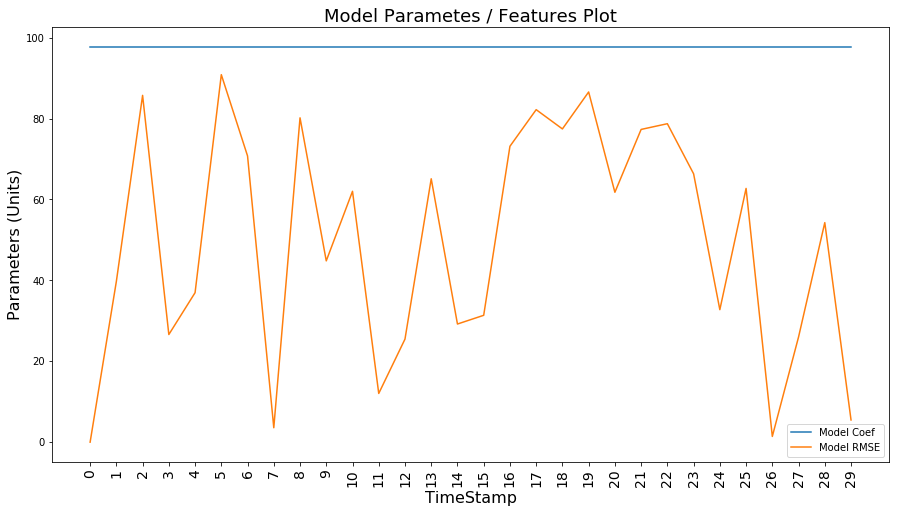

In [44]:
plotModelFeatures()

## Here Model is trainned at each day end and used for next day prediction

In [54]:
num_of_days = 30
model_parameters = []
for day in range(num_of_days):
    print('# [ DAY  {} ]========================================== #'.format(day))
    new_dataset = generateNewDataset(num_samples=1000)
    x_train, y_train, x_test, y_test = dataPreparation()
        
    prediction = makePrediction(trainned_model, x_data)
    model_rmse = checkModelPerformance(y_data, prediction)
    model_parameters.append(captureModelTrainingParameters(day))
    
model_parameters = pd.DataFrame(model_parameters)
model_parameters.head()

# [ DAY  0 ]========================================== #
	 [ * ] Data Preparating
	 [ * ] Model Predicting
	 [ * ] Checking Model Preformance Score
# [ DAY  1 ]========================================== #
	 [ * ] Data Preparating
	 [ * ] Model Predicting
	 [ * ] Checking Model Preformance Score
# [ DAY  2 ]========================================== #
	 [ * ] Data Preparating
	 [ * ] Model Predicting
	 [ * ] Checking Model Preformance Score
# [ DAY  3 ]========================================== #
	 [ * ] Data Preparating
	 [ * ] Model Predicting
	 [ * ] Checking Model Preformance Score
# [ DAY  4 ]========================================== #
	 [ * ] Data Preparating
	 [ * ] Model Predicting
	 [ * ] Checking Model Preformance Score
# [ DAY  5 ]========================================== #
	 [ * ] Data Preparating
	 [ * ] Model Predicting
	 [ * ] Checking Model Preformance Score
# [ DAY  6 ]========================================== #
	 [ * ] Data Preparating
	 [ * ] Model Predicting
	 [ *

,model_coef,model_intercept,model_rmse,timestamp,x_feature_mean,x_feature_std,y_feature_mean,y_feature_std
0,46.288568,-2.220446e-16,11.207724,2020-05-02 01:18,0.078973,0.984033,4.773296,59.477428
1,46.288568,-2.220446e-16,11.207724,2020-05-03 01:18,0.002635,0.989428,0.258974,97.236435
2,46.288568,-2.220446e-16,11.207724,2020-05-04 01:18,-0.036232,0.978987,-3.046333,82.310940
3,46.288568,-2.220446e-16,11.207724,2020-05-05 01:18,0.011753,0.972825,0.821250,67.974070
4,46.288568,-2.220446e-16,11.207724,2020-05-06 01:18,-0.046428,1.019441,-0.706013,15.502414


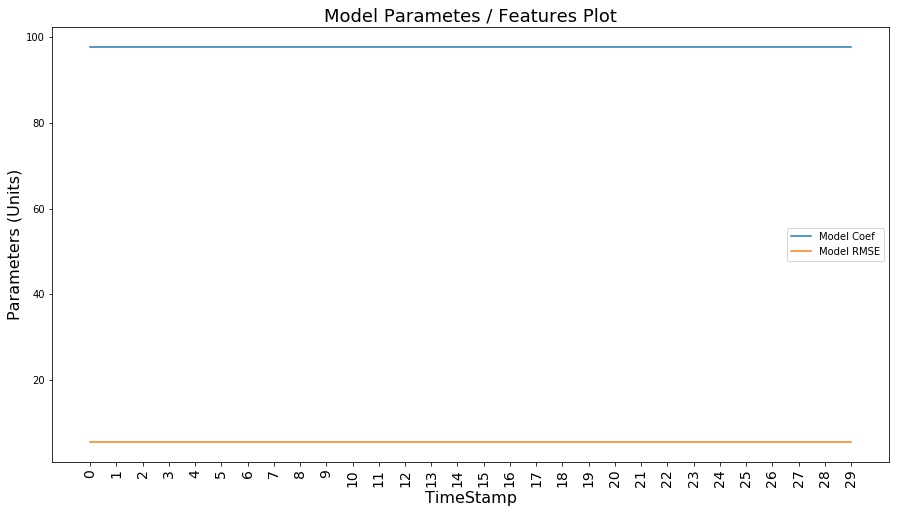

In [47]:
plotModelFeatures()